In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

mpl.rcParams['axes.unicode_minus'] = False

import json
import folium

In [2]:
#2017년
test1 = pd.read_csv('data/서울특별시 공공자전거 이용정보(시간대별)_2017년_1.csv', parse_dates=["'대여일자'"],encoding='CP949')
test2 = pd.read_csv('data/서울특별시 공공자전거 이용정보(시간대별)_2017년_2.csv', parse_dates=["'대여일자'"],encoding='CP949')
test3 = pd.read_csv('data/서울특별시 공공자전거 이용정보(시간대별)_2017년_3.csv', parse_dates=["'대여일자'"],encoding='CP949')
test4 = pd.read_csv('data/서울특별시 공공자전거 이용정보(시간대별)_2017년_4.csv', parse_dates=["'대여일자'"],encoding='CP949')
test5 = pd.read_csv('data/서울특별시 공공자전거 이용정보(시간대별)_2017년_5.csv', parse_dates=["'대여일자'"],encoding='CP949')
test6 = pd.read_csv('data/서울특별시 공공자전거 이용정보(시간대별)_2017년_6.csv', parse_dates=["'대여일자'"],encoding='CP949')

In [3]:
test2017=pd.concat([test1,test2,test3,test4,test5,test6]) #데이터 합침
test2017.head()

,'대여일자','대여시간','대여소번호','대여소','대여구분코드','성별','연령대코드','이용건수','운동량','탄소량','이동거리(M)','이동시간(분)'
0,2017-01-01,'00','230',' 영등포구청역 1번출구','정기','F','~10대',1,31.27,0.39,1680,155
1,2017-01-01,'00','315',' 신한은행 안국역지점 옆','정기','F','20대',1,47.32,0.55,2390,15
2,2017-01-01,'00','328',' 탑골공원 앞','정기','F','20대',1,57.92,0.52,2250,13
3,2017-01-01,'00','175',' 홍연2교옆','정기','F','20대',1,133.29,1.53,6600,43
4,2017-01-01,'00','817',' 삼각지역 4번출구 앞','정기','F','20대',1,33.88,0.32,1380,8


In [4]:
test2017.tail()

,'대여일자','대여시간','대여소번호','대여소','대여구분코드','성별','연령대코드','이용건수','운동량','탄소량','이동거리(M)','이동시간(분)'
599191,2017-12-31,'23','502',' 뚝섬유원지역 1번출구 앞','일일(비회원)','',NaN,1,96.01,0.87,3730,104
599192,2017-12-31,'23','512',' 뚝섬역 1번 출구 옆','일일(비회원)','M',NaN,1,207.98,1.87,8080,48
599193,2017-12-31,'23','1022',' 길동 사거리(초소앞)','단체','F','20대',3,439.09,4.60,19800,160
599194,2017-12-31,'23','540',' 군자역 7번출구 베스트샵 앞','단체','M','30대',2,581.53,4.55,19580,191
599195,2017-12-31,'23','1245',' 문정 법조단지9','단체','M','30대',2,613.62,4.23,18230,142


In [5]:
test2017["'대여시간'"]

0         '00'
1         '00'
2         '00'
3         '00'
4         '00'
          ... 
599191    '23'
599192    '23'
599193    '23'
599194    '23'
599195    '23'
Name: '대여시간', Length: 4196232, dtype: object

In [6]:
test2017.shape

(4196232, 12)

In [7]:
test2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4196232 entries, 0 to 599195
Data columns (total 12 columns):
 #   Column     Dtype         
---  ------     -----         
 0   '대여일자'     datetime64[ns]
 1   '대여시간'     object        
 2   '대여소번호'    object        
 3   '대여소'      object        
 4   '대여구분코드'   object        
 5   '성별'       object        
 6   '연령대코드'    object        
 7   '이용건수'     int64         
 8   '운동량'      float64       
 9   '탄소량'      float64       
 10  '이동거리(M)'  int64         
 11  '이동시간(분)'  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 416.2+ MB


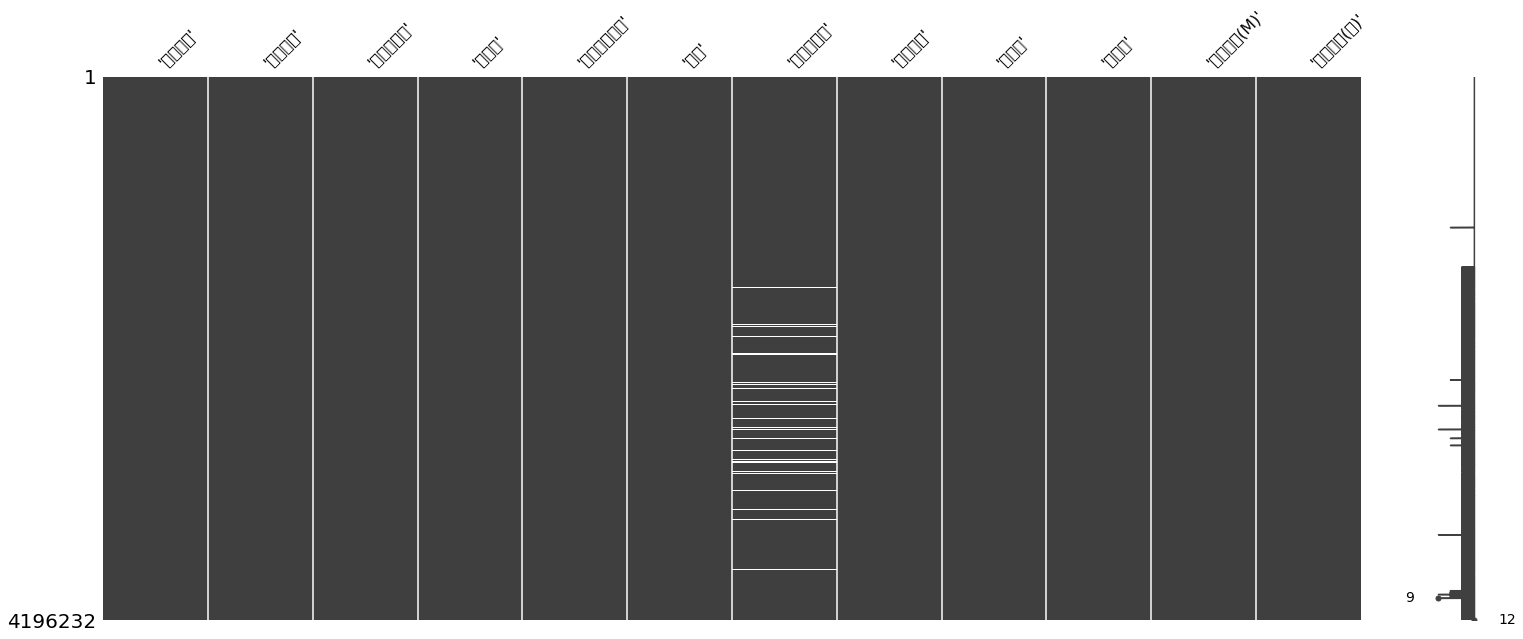

In [8]:
msno.matrix(test2017) #결측치 확인
plt.show()

In [9]:
test2017.isnull().sum() #컬럼별로 결측지 있는지 확인

'대여일자'            0
'대여시간'            0
'대여소번호'          33
'대여소'            33
'대여구분코드'          0
'성별'              0
'연령대코드'      135112
'이용건수'            0
'운동량'             0
'탄소량'             0
'이동거리(M)'         0
'이동시간(분)'         0
dtype: int64

In [10]:
test2017['월']=test2017["'대여일자'"].dt.month
test2017['일']=test2017["'대여일자'"].dt.day
test2017['요일']=test2017["'대여일자'"].dt.weekday

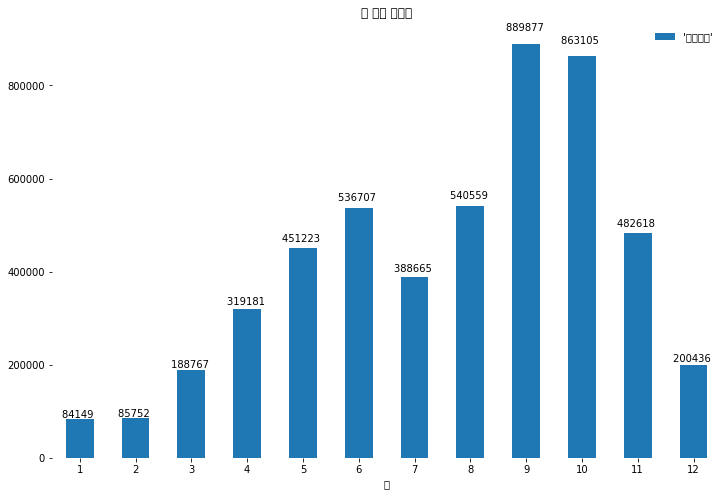

In [36]:
month = test2017.groupby(['월'])[["'이용건수'"]].agg('sum')
ax=month.plot(kind='bar', figsize=(12, 8), rot=0, title="월 기준 사용량")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height*1.03), ha='center')
plt.box(False)
plt.legend(frameon=False)
plt.show()

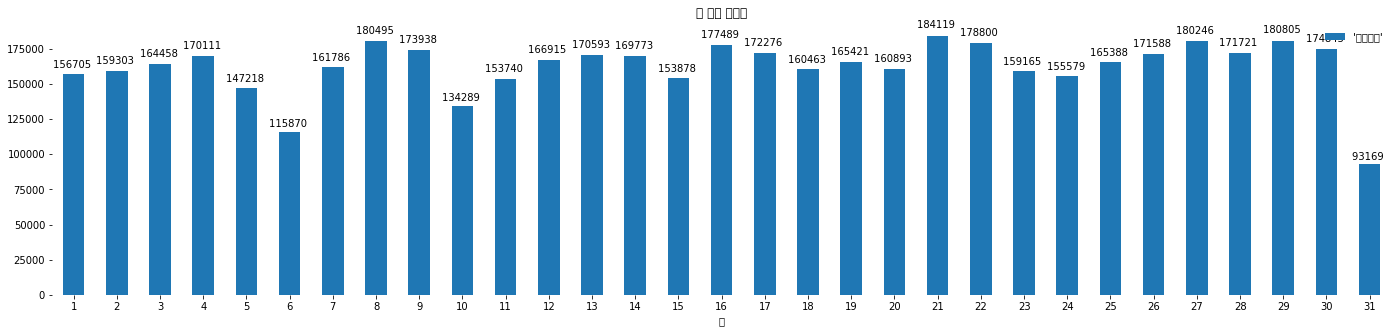

In [39]:
day = test2017.groupby(['일'])[["'이용건수'"]].agg('sum')
ax=day.plot(kind='bar', figsize=(24, 5), rot=0, title="일 기준 사용량")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d "%(height), (left+width/2, height*1.03), ha='center')
plt.box(False)
plt.legend(frameon=False)
plt.show()

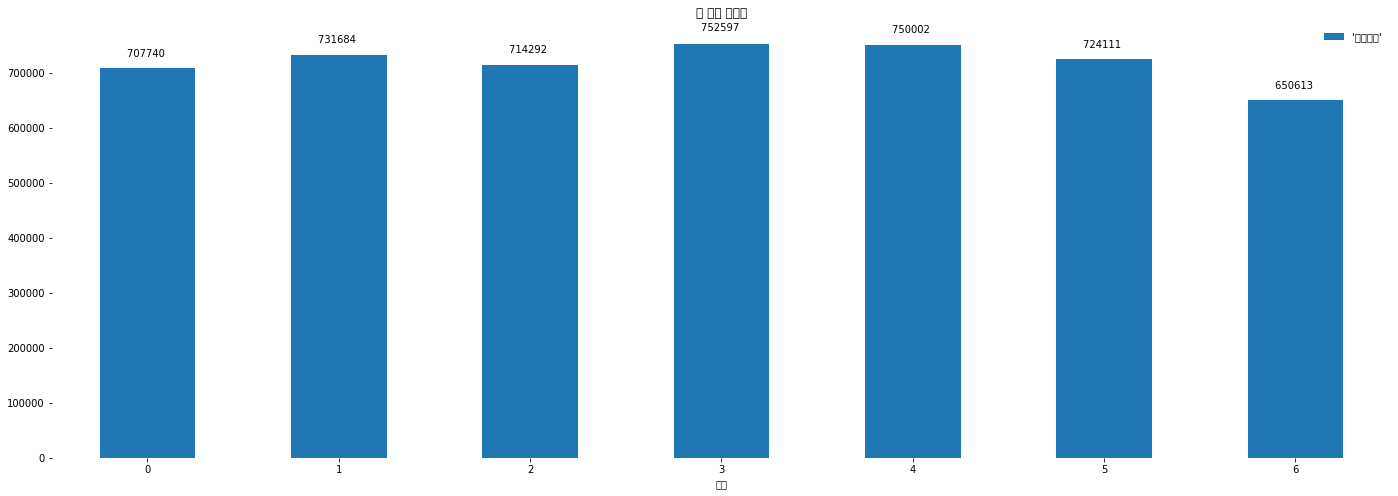

In [41]:
weekday = test2017.groupby(['요일'])[["'이용건수'"]].agg('sum')
ax=weekday.plot(kind='bar', figsize=(24, 8), rot=0, title="월 기준 사용량")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d "%(height), (left+width/2, height*1.03), ha='center')
plt.box(False)
plt.legend(frameon=False)
plt.show()

In [33]:
#메모리 에러나서 해줌
del test2017

NameError: name 'test2017' is not defined

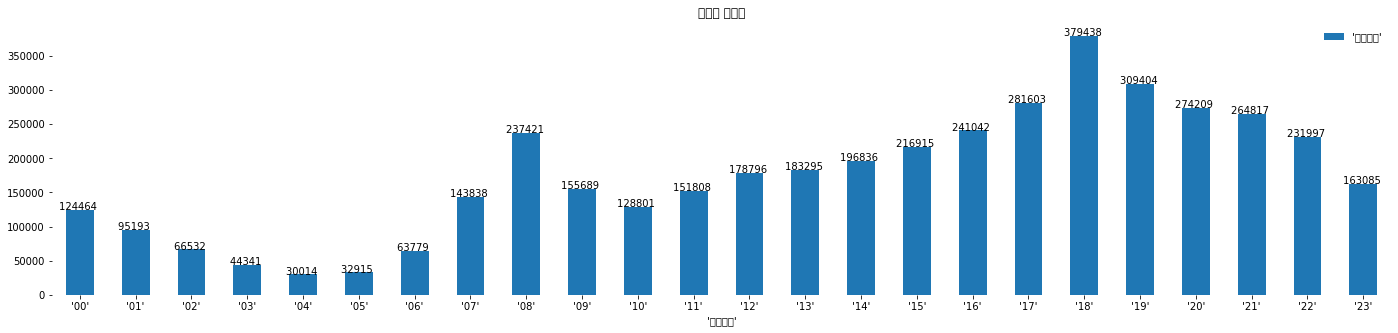

In [45]:
time=test2017.groupby("'대여시간'")["'이용건수'"].count()
ax=time.plot(kind='bar', figsize=(24, 5), rot=0, title="시간별 사용량")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d "%(height), (left+width/2, height*1.03), ha='center')
plt.box(False)
plt.legend(frameon=False)
plt.show()